<a href="https://colab.research.google.com/github/shirsh10mall/Deep-Learning-Course-IIT-Delhi-APL745-/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Example Problem

In [3]:
point = np.array([5,6])

In [4]:
def function(x1,x2):
  y = 12.069*(x1**2) + 21.504*(x2**2) - 1.7321*x1 - x2
  return y

In [5]:
def analytical_gradient_function(x1,x2):
  y1 = 24.138*x1 - 1.7321
  y2 = 43.008*x2 - 1
  return np.array([y1,y2]).reshape(-1,1)

In [6]:
analytical_solution = analytical_gradient_function(point[0],point[1])
analytical_solution

array([[118.9579],
       [257.048 ]])

In [7]:
epsilon_min = 0.0001 # np.finfo('float').eps
print("Minimum Epsilon : ", epsilon_min)
epsilon = max(epsilon_min,max(0.01*point))
print("epsilon : ", epsilon)

Minimum Epsilon :  0.0001
epsilon :  0.06


In [8]:
def forward_difference_derivative(x1,x2,epsilon):
  y1 = (function(x1+epsilon,x2) - function(x1,x2) )/epsilon
  y2 = (function(x1,x2+epsilon) - function(x1,x2) )/epsilon
  return np.array([y1,y2])

print("Derivative using Forward Difference: ",forward_difference_derivative(point[0],point[1],epsilon))

Derivative using Forward Difference:  [119.68204 258.33824]


In [9]:
def backward_difference_derivative(x1,x2,epsilon):
  y1 = (function(x1,x2) - function(x1-epsilon,x2) )/epsilon
  y2 = (function(x1,x2) - function(x1,x2-epsilon) )/epsilon
  return np.array([y1,y2])

print("Derivative using Backward Difference: ",backward_difference_derivative(point[0],point[1],epsilon))

Derivative using Backward Difference:  [118.23376 255.75776]


In [10]:
def central_difference_derivative(x1,x2,epsilon):
  y1 = (function(x1+epsilon/2,x2) - function(x1-epsilon/2,x2) )/epsilon
  y2 = (function(x1,x2+epsilon/2) - function(x1,x2-epsilon/2) )/epsilon
  return np.array([y1,y2])

print("Derivative using Central Difference: ",central_difference_derivative(point[0],point[1],epsilon))

Derivative using Central Difference:  [118.9579 257.048 ]


# Assignment Problem

In [11]:
def function(x1,x2):
  y = (4*(x2**2) - x1*x2)/(10000*(x2*(x1**3)-(x1**4)))
  return y

def analytical_gradient_function(x1,x2):
  y1 = (3*x2*(6*x1*x2-x1**2-4*(x2**2)))/(10000*(x1**4)*((x2-x1)**2))
  y2 = (4*(x2**2)-8*x1*x2+x1**2)/(10000*(x1**3)*((x2-x1)**2))
  return np.array([y1,y2]).reshape(-1,1)

point = np.array([0.5,1.5])

epsilon_min = 0.0001 # np.finfo('float').eps
print("Minimum Epsilon : ", epsilon_min)
epsilon = max(epsilon_min,max(0.01*point))
print("Epsilon : ", epsilon)

Minimum Epsilon :  0.0001
Epsilon :  0.015


In [12]:
print("Derivative using Analytical Solution: ",analytical_gradient_function(point[0],point[1]))
print("Derivative using Forward Difference: ",forward_difference_derivative(point[0],point[1],epsilon))
print("Derivative using Backward Difference: ",backward_difference_derivative(point[0],point[1],epsilon))
print("Derivative using Central Difference: ",central_difference_derivative(point[0],point[1],epsilon))

Derivative using Analytical Solution:  [[-0.0342]
 [ 0.0026]]
Derivative using Forward Difference:  [-0.03232065  0.00260887]
Derivative using Backward Difference:  [-0.03627113  0.00259086]
Derivative using Central Difference:  [-0.03422394  0.00259997]


In [32]:
epsilon_min = 0.00001 # np.finfo('float').eps
epsilon_list = np.linspace(epsilon_min,max(0.5*point),100000)

y1_forward_error = []
y2_forward_error = []
y1_backward_error = []
y2_backward_error = []
y1_central_error = []
y2_central_error = []

y_analytical = analytical_gradient_function(point[0],point[1])

for epsilon in epsilon_list:
  

  y = forward_difference_derivative(point[0],point[1],epsilon)

  y1_forward_error.append( abs(y_analytical[0]-y[0]) )
  y2_forward_error.append( abs(y_analytical[1]-y[1]) )

  y = backward_difference_derivative(point[0],point[1],epsilon)
  y1_backward_error.append( abs(y_analytical[0]-y[0]) )
  y2_backward_error.append( abs(y_analytical[1]-y[1]) )

  y = central_difference_derivative(point[0],point[1],epsilon)
  y1_central_error.append( abs(y_analytical[0]-y[0]) )
  y2_central_error.append( abs(y_analytical[1]-y[1]) )

print("Done")

Done


Forward Differrence Method (Error as Epsilon Plot)


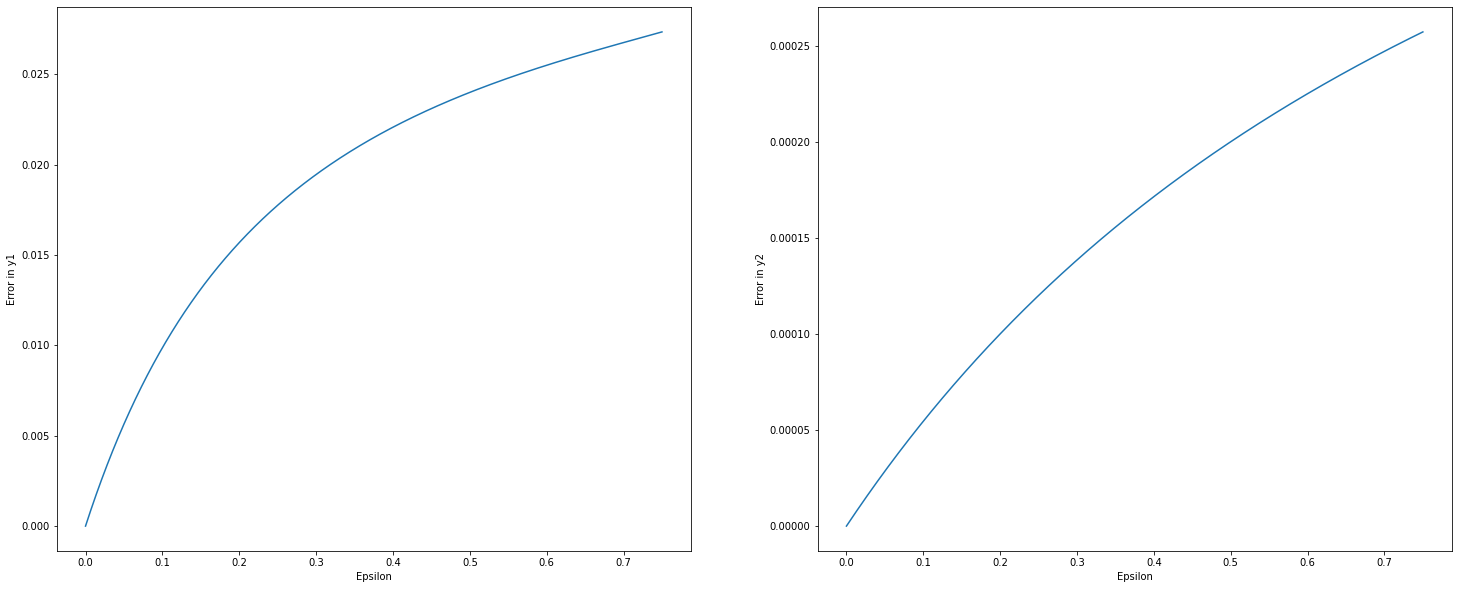

In [33]:
print("Forward Differrence Method (Error as Epsilon Plot)")

plt.figure(figsize=(25,10)) 

plt.subplot(1, 2, 1)
plt.plot(epsilon_list,y1_forward_error)
plt.ylabel("Error in y1")
plt.xlabel("Epsilon")
plt.subplot(1, 2, 2)
plt.plot(epsilon_list,y2_forward_error)
plt.ylabel("Error in y2")
plt.xlabel("Epsilon")

plt.show()

Backward Differrence Method (Error as Epsilon Plot)


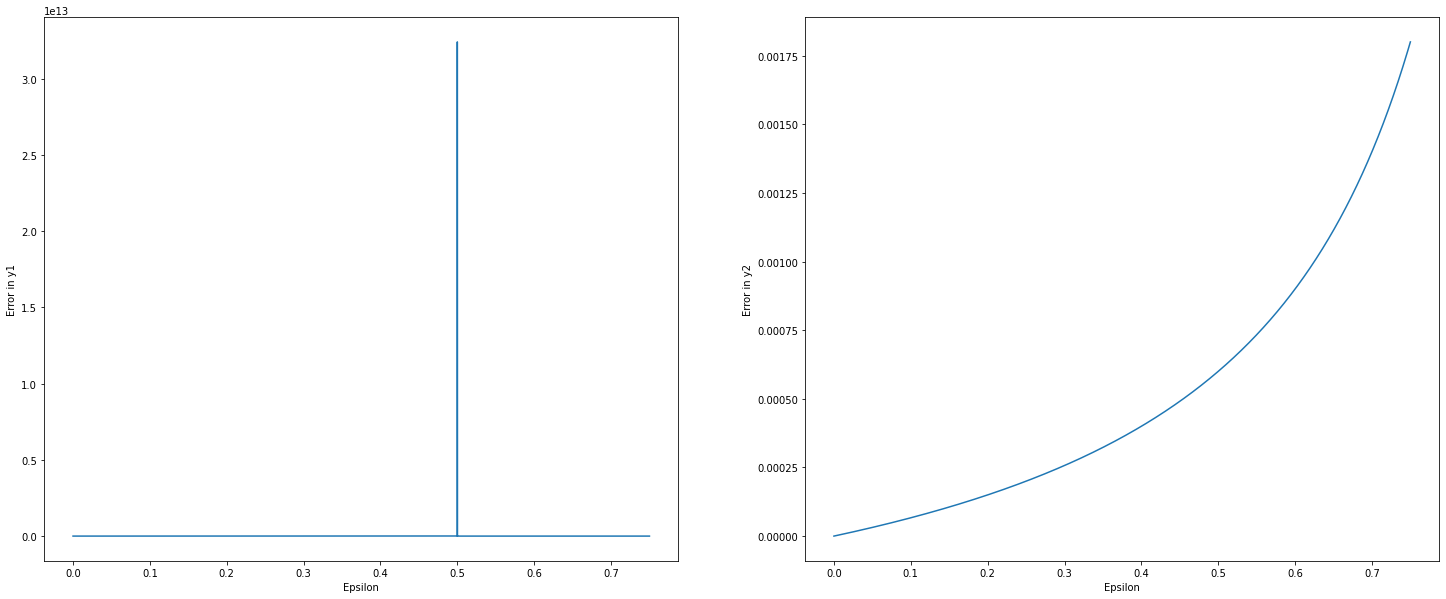

In [34]:
print("Backward Differrence Method (Error as Epsilon Plot)")

plt.figure(figsize=(25,10)) 

plt.subplot(1, 2, 1)
plt.plot(epsilon_list,y1_backward_error)
plt.ylabel("Error in y1")
plt.xlabel("Epsilon")
plt.subplot(1, 2, 2)
plt.plot(epsilon_list,y2_backward_error)
plt.ylabel("Error in y2")
plt.xlabel("Epsilon")

plt.show()

Certral Differrence Method (Error as Epsilon Plot)


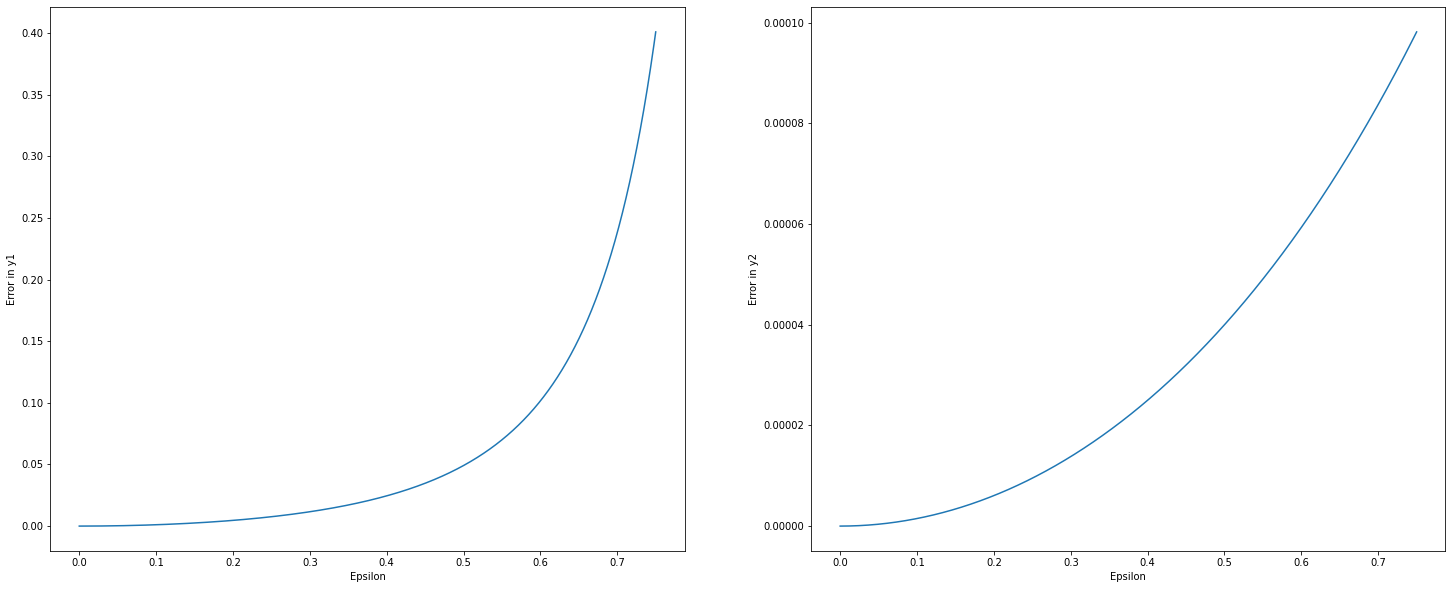

In [35]:
print("Certral Differrence Method (Error as Epsilon Plot)")

plt.figure(figsize=(25,10)) 

plt.subplot(1, 2, 1)
plt.plot(epsilon_list,y1_central_error)
plt.ylabel("Error in y1")
plt.xlabel("Epsilon")
plt.subplot(1, 2, 2)
plt.plot(epsilon_list,y2_central_error)
plt.ylabel("Error in y2")
plt.xlabel("Epsilon")

plt.show()